In [214]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import random

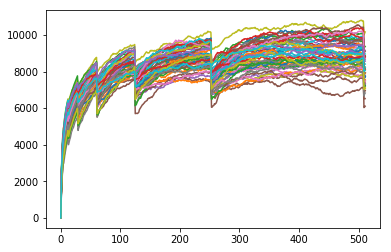

In [216]:
outs = []
for test in range(500):
    out = []
    alpha = np.random.uniform(-.45,-.25)
    c = np.random.uniform(8000,9800)
    alpha_0 = alpha
    for epoch in range(1,513):
        if epoch in np.cumsum([2**x for x in range(1,10)]):
            alpha = alpha_0
        else:
            alpha += np.random.uniform(-.01,.0)
        c+=min(9800,np.random.uniform(-50,50))
        val = c*(1-epoch**alpha)
        out += [val]
    outs += [out]
    
for out in random.sample(outs,50):
    plt.plot(out)
plt.show()


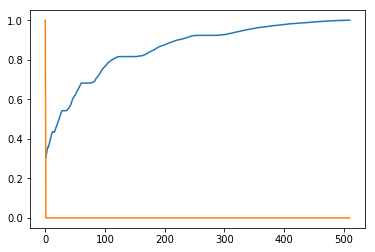

In [212]:
losses = np.array(outs)
maxes = np.max(losses,1)
up_to_max = [np.max(losses[:,:x],1) for x in range(1,losses.shape[1])]
plt.plot([pearsonr(x,maxes) for x in up_to_max])